In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read csv
df = pd.read_csv('listuu.csv')
#df = df.tail(110)
df.head()

,yymmdd,uu
0,2019-09-01,142093
1,2019-09-02,134372
2,2019-09-03,137703
3,2019-09-04,130252
4,2019-09-05,126291


In [75]:
df.shape

(122, 2)

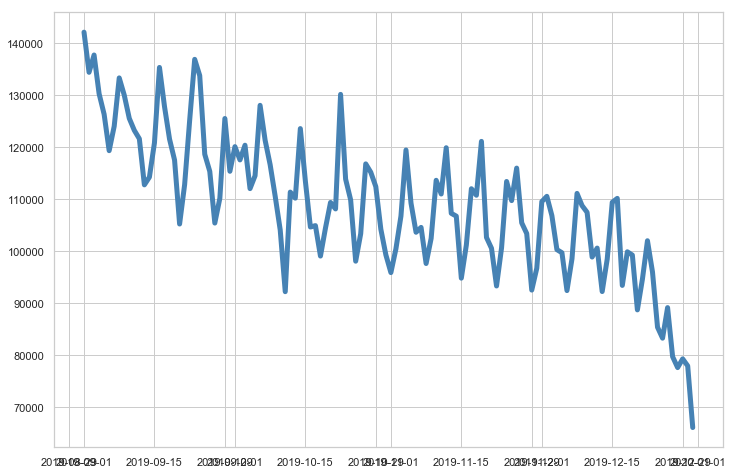

In [76]:
df['yymmdd'] = pd.to_datetime(df['yymmdd'])
df = df.set_index('yymmdd')

# トラフィック数を可視化
plt.rcParams['figure.figsize'] = 12, 8
plt.plot(df.index, df["uu"], linewidth=5, color="steelblue")

In [77]:
df = df[["uu"]]
df.head()

,uu
yymmdd,
2019-09-01,142093
2019-09-02,134372
2019-09-03,137703
2019-09-04,130252
2019-09-05,126291


In [100]:
df["cap"] = df["uu"].max()

In [101]:
from fbprophet import Prophet

df_input = df.reset_index().rename(columns={'yymmdd':'ds', 'uu':'y'})
model = Prophet(growth='logistic', daily_seasonality=False, n_changepoints=10)
model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.fit(df_input)

TypeError: add_seasonality() missing 1 required positional argument: 'fourier_order'

In [96]:
future = model.make_future_dataframe(periods=30)
future["cap"] = df["uu"].max()
forecast = model.predict(future)

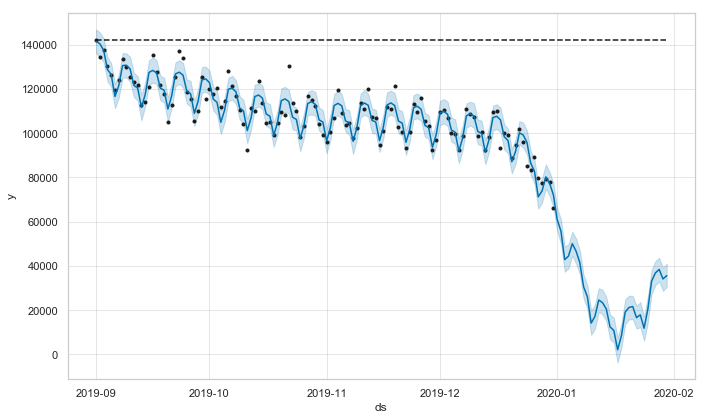

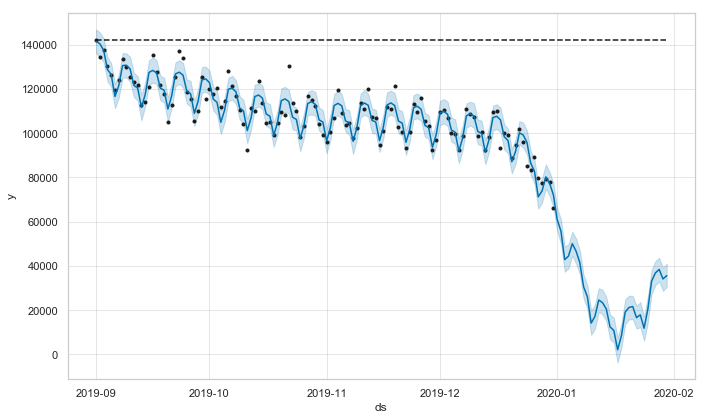

In [97]:
model.plot(forecast)

In [98]:
import seaborn as sns
import numpy as np

# add change rates to changepoints
df_changepoints = df_input.loc[model.changepoints.index]
df_changepoints['delta'] = model.params['delta'].ravel()*1000000000
# df_changepoints["abs"] = np.abs(df_changepoints['delta'])*1000000000

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



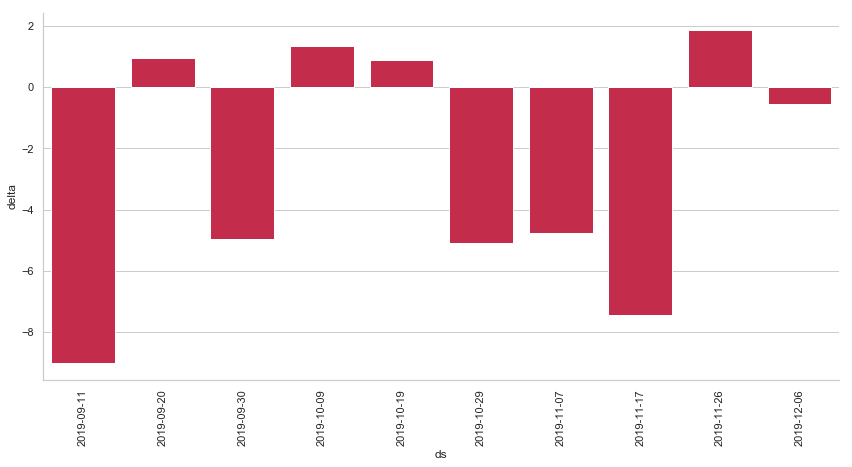

In [99]:
# get changepoints
df_changepoints['ds'] = df_changepoints['ds'].astype(str)
df_changepoints['delta'] = df_changepoints['delta'].round(2)
df_selection = df_changepoints[df_changepoints['delta'] != 0]
date_changepoints = df_selection['ds'].astype('datetime64[ns]').reset_index(drop=True)

# plot
plt.rcParams['figure.figsize'] = 15, 8
sns.set(style='whitegrid')
ax = sns.factorplot(x='ds', y='delta', data=df_changepoints, kind='bar', color='crimson', size=6, aspect=2)
ax.set_xticklabels(rotation=90)

In [41]:
cp = df_changepoints.sort_values("abs", ascending=False)
cp.head(10)

,ds,y,cap,delta,abs
22,2019-09-23,136870,142093,1.463156e-03,1.463156e+06
13,2019-09-14,114211,142093,9.139291e-04,9.139291e+05
38,2019-10-09,110538,142093,1.614954e-06,1.614954e+03
42,2019-10-13,110159,142093,1.175883e-06,1.175883e+03
10,2019-09-11,123205,142093,1.889193e-07,1.889193e+02
26,2019-09-27,105368,142093,1.651185e-07,1.651185e+02
3,2019-09-04,130252,142093,-2.900522e-08,2.900522e+01
48,2019-10-19,104424,142093,1.648516e-08,1.648516e+01
74,2019-11-14,106699,142093,1.255225e-08,1.255225e+01
45,2019-10-16,104610,142093,-1.122416e-08,1.122416e+01


In [42]:
df_changepoints.head()

,ds,y,cap,delta,abs
3,2019-09-04,130252,142093,-2.900522e-08,29.005224
6,2019-09-07,123992,142093,6.981277e-09,6.981277
10,2019-09-11,123205,142093,1.889193e-07,188.919338
13,2019-09-14,114211,142093,9.139291e-04,913929.057363
16,2019-09-17,127787,142093,-5.210428e-09,5.210428


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



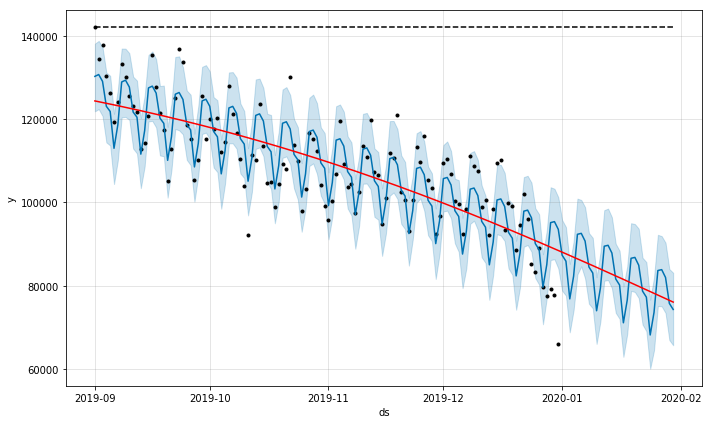

In [43]:
from fbprophet.plot import add_changepoints_to_plot
model = Prophet(growth='logistic', daily_seasonality=False)
model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.fit(df_input)

future = model.make_future_dataframe(periods=30)
future["cap"] = df["uu"].max()
forecast = model.predict(future)

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



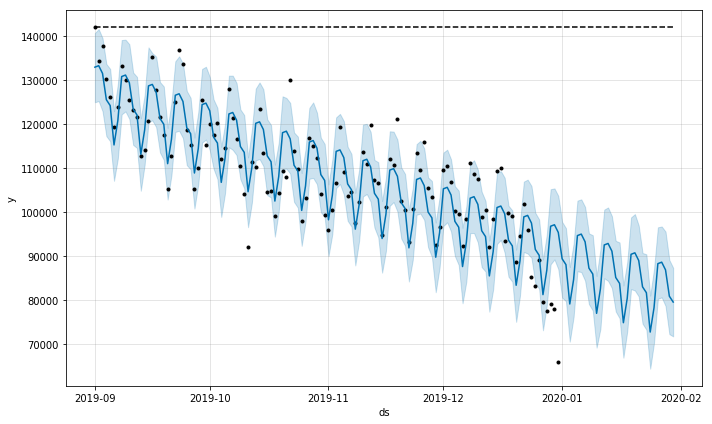

In [44]:
# Python
m = Prophet(changepoints=['2019-09-30'])
forecast = m.fit(df_input).predict(future)
fig = m.plot(forecast)